In [3]:
import pandas as pd
import numpy as np
import efinance as ef
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Check definition of return

In [4]:
df = ef.stock.get_quote_history('600000')

In [5]:
# 假设df是你的DataFrame，'column_name'是列名
filtered_df = df[(df['日期'] > '2010-01-01') & (df['日期'] < '2025-01-01')]

In [6]:
filtered_df

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
2380,浦发银行,600000,2010-01-04,4.20,3.94,4.22,3.93,661913,1.419984e+09,6.99,-5.06,-0.21,0.84
2381,浦发银行,600000,2010-01-05,4.03,4.01,4.10,3.77,1151479,2.436891e+09,8.38,1.78,0.07,1.45
2382,浦发银行,600000,2010-01-06,3.98,3.83,3.99,3.81,967826,2.034174e+09,4.49,-4.49,-0.18,1.22
2383,浦发银行,600000,2010-01-07,3.81,3.64,3.88,3.57,852361,1.761801e+09,8.09,-4.96,-0.19,1.08
2384,浦发银行,600000,2010-01-08,3.59,3.73,3.78,3.57,657076,1.349532e+09,5.77,2.47,0.09,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,浦发银行,600000,2024-12-25,10.13,10.35,10.39,10.13,727396,7.491351e+08,2.57,2.17,0.22,0.25
5972,浦发银行,600000,2024-12-26,10.35,10.34,10.39,10.16,611522,6.283943e+08,2.22,-0.10,-0.01,0.21
5973,浦发银行,600000,2024-12-27,10.33,10.36,10.39,10.12,695064,7.147021e+08,2.61,0.19,0.02,0.24
5974,浦发银行,600000,2024-12-30,10.34,10.47,10.49,10.31,784778,8.186578e+08,1.74,1.06,0.11,0.27


### 变量的定义

可以看到，涨跌幅是今收比昨收的简单收益率，涨跌额是今收比昨收的变化值

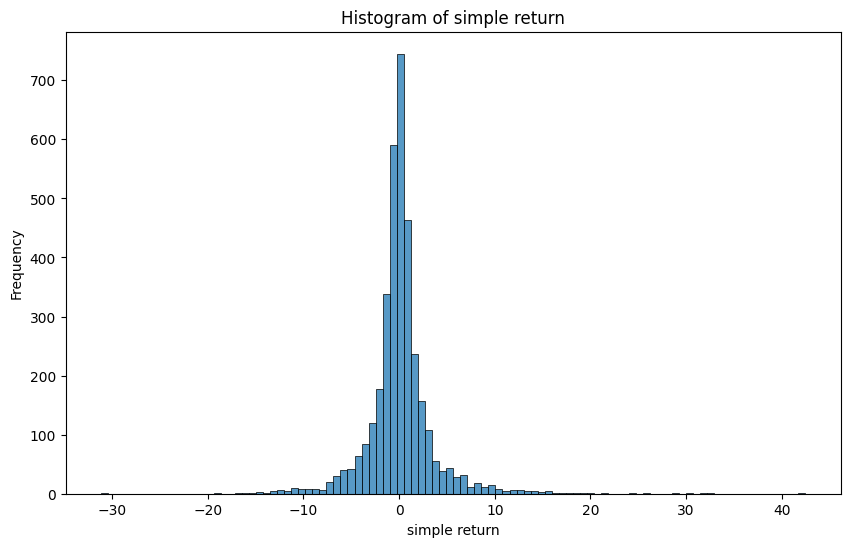

In [14]:
# 基础直方图
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df["涨跌幅"], kde=False, bins=100)  # kde=False表示不显示核密度估计
plt.title(f'Histogram of simple return')
plt.xlabel("simple return")
plt.ylabel('Frequency')
plt.show()

### Preliminary statistics

In [45]:
df_simple_return = filtered_df["涨跌幅"]


In [46]:
data = df_simple_return
mean = np.mean(data)          # 均值
variance = np.var(data)       # 方差
skewness = stats.skew(data)   # 偏度
kurtosis = stats.kurtosis(data)  # 峰度(默认计算超额峰度)

# 如果要计算原始峰度(非超额峰度)，加上3
raw_kurtosis = stats.kurtosis(data, fisher=False)

print(f"均值: {mean:.4f}")
print(f"方差: {variance:.4f}")
print(f"偏度: {skewness:.4f}")
print(f"超额峰度: {kurtosis:.4f}")
print(f"原始峰度: {raw_kurtosis:.4f}")

均值: 0.0909
方差: 13.4537
偏度: 1.4701
超额峰度: 17.0836
原始峰度: 20.0836


### 总结
可以看到使用简单收益率的定义，收益率的分布偏度为正值，且超额峰度显著大于0，下面我们绘制其分布，并用正态分布来拟合该值

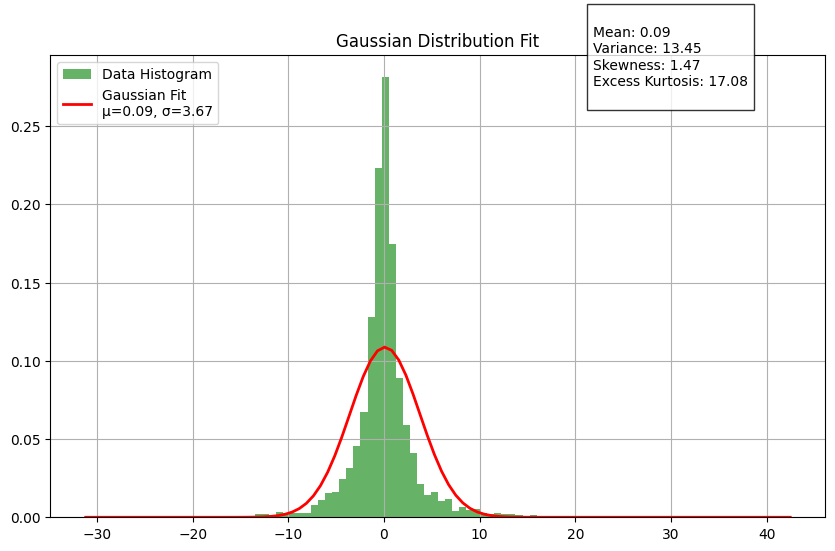

In [16]:
# 拟合高斯分布参数
mu, sigma = stats.norm.fit(data)

# 创建直方图
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Data Histogram')

# 绘制拟合曲线
x = np.linspace(min(bins), max(bins), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
         label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}')

# 添加统计信息文本
stats_text = f"""
Mean: {mean:.2f}
Variance: {variance:.2f}
Skewness: {skewness:.2f}
Excess Kurtosis: {kurtosis:.2f}
"""
plt.text(0.7, 0.9, stats_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.title('Gaussian Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


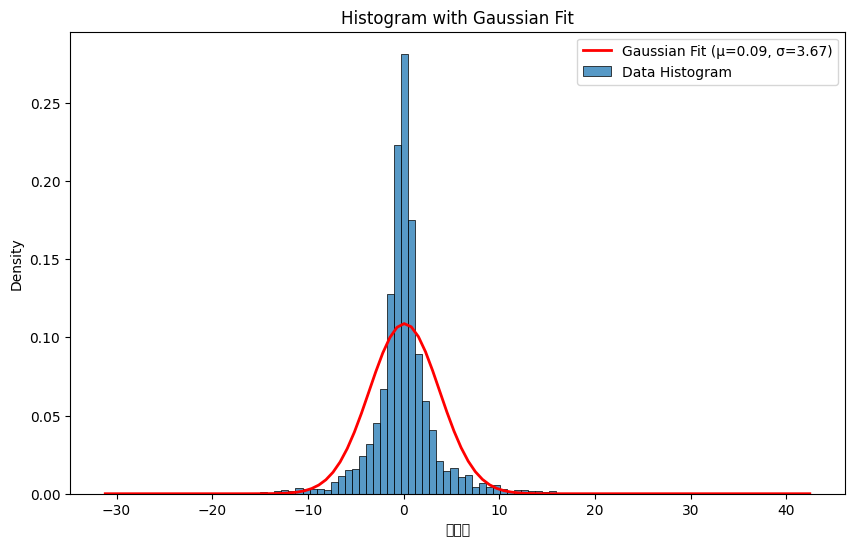

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.histplot(data, kde=False, stat='density', bins=100, label='Data Histogram')

# 拟合高斯分布并绘制
(mu, sigma) = stats.norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', lw=2, label=f'Gaussian Fit (μ={mu:.2f}, σ={sigma:.2f})')

plt.title('Histogram with Gaussian Fit')
plt.legend()
plt.show()

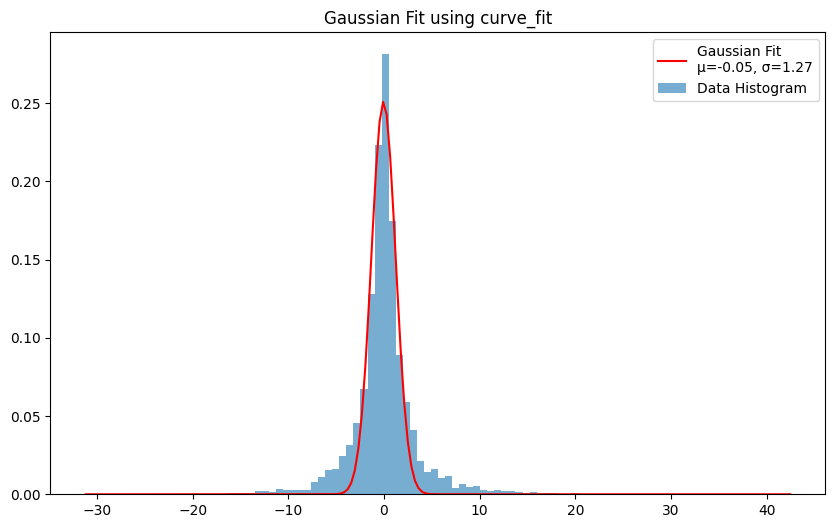

In [30]:
from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 生成直方图数据
hist, bin_edges = np.histogram(data, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 初始参数猜测
initial_guess = [np.mean(data), np.std(data), 1]

# 拟合
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)

# 绘图
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=np.diff(bin_edges), alpha=0.6, label='Data Histogram')
x_fit = np.linspace(min(data), max(data), 200)
plt.plot(x_fit, gaussian(x_fit, *popt), 'r-', label=f'Gaussian Fit\nμ={popt[0]:.2f}, σ={popt[1]:.2f}')

plt.title('Gaussian Fit using curve_fit')
plt.legend()
plt.show()

验证中心极限定理

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


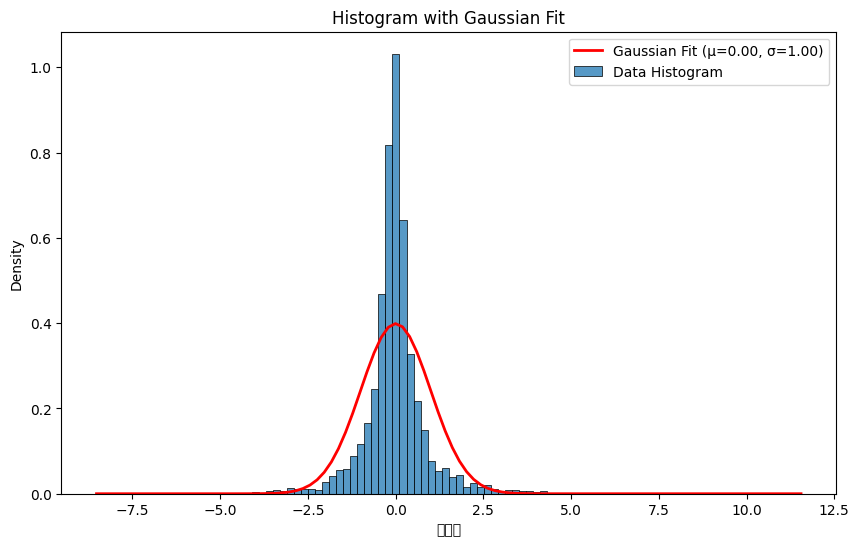

In [29]:
mu_data, std_data, len_data = np.mean(data), np.std(data), len(data)
data_trans = (data - mu_data)/(std_data)
mu_trans, std_trans = np.mean(data_trans), np.std(data_trans)
plt.figure(figsize=(10, 6))
ax = sns.histplot(data_trans, kde=False, stat='density', bins=100, label='Data Histogram')

# 拟合高斯分布并绘制
(mu, sigma) = stats.norm.fit(data_trans)
x = np.linspace(data_trans.min(), data_trans.max(), 100)
pdf1 = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf1, 'r-', lw=2, label=f'Gaussian Fit (μ={mu:.2f}, σ={sigma:.2f})')

# x = np.linspace(data_trans.min(), data_trans.max(), 100)
# pdf1 = stats.norm.pdf(x, mu_trans, std_trans)
# plt.plot(x, pdf1, 'b-', lw=2, label=f'Gaussian Fit (μ={mu_trans:.2f}, σ={std_trans:.2f})')

plt.title('Histogram with Gaussian Fit')
plt.legend()
plt.show()

### 对数收益率

In [40]:
ln_return = np.log(filtered_df["涨跌幅"] + 1.0)
data_ln = ln_return[np.isfinite(ln_return)]

/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pku/zhaoyz/anaconda3/envs/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


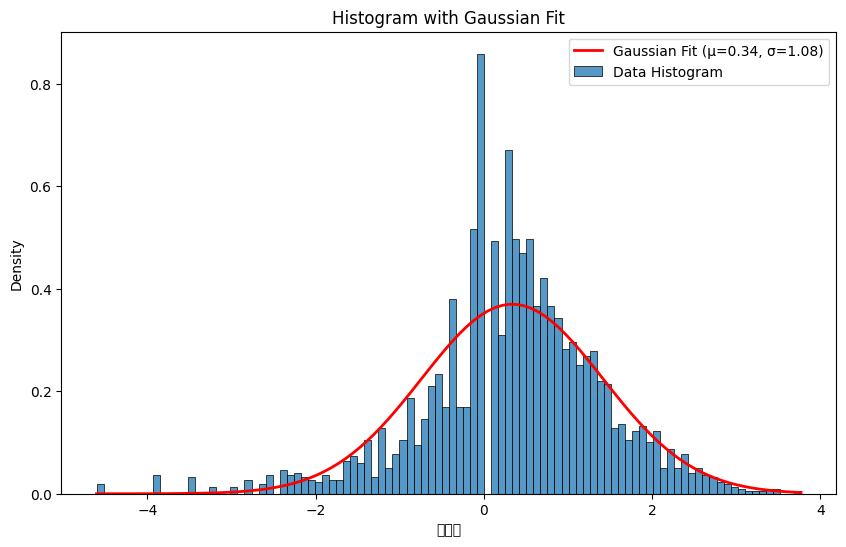

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data_ln, kde=False, stat='density', bins=100, label='Data Histogram')

# 拟合高斯分布并绘制
(mu, sigma) = stats.norm.fit(data_ln)
x = np.linspace(data_ln.min(), data_ln.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', lw=2, label=f'Gaussian Fit (μ={mu:.2f}, σ={sigma:.2f})')

plt.title('Histogram with Gaussian Fit')
plt.legend()
plt.show()

In [43]:
data = data_ln
mean = np.mean(data)          # 均值
variance = np.var(data)       # 方差
skewness = stats.skew(data)   # 偏度
kurtosis = stats.kurtosis(data)  # 峰度(默认计算超额峰度)

# 如果要计算原始峰度(非超额峰度)，加上3
raw_kurtosis = stats.kurtosis(data, fisher=False)

print(f"均值: {mean:.4f}")
print(f"方差: {variance:.4f}")
print(f"偏度: {skewness:.4f}")
print(f"超额峰度: {kurtosis:.4f}")
print(f"原始峰度: {raw_kurtosis:.4f}")

均值: 0.3381
方差: 1.1651
偏度: -0.5885
超额峰度: 1.7474
原始峰度: 4.7474


使用了log return之后，峰度明显降低，但偏度变成负值，从图上也能看出有明显的左偏倾向。

### Return as a function of time

In [51]:
filtered_df["日期"] = pd.to_datetime(filtered_df["日期"])

/tmp/ipykernel_9476/1914412939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["日期"] = pd.to_datetime(filtered_df["日期"])


/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/3241243930.py:14: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}

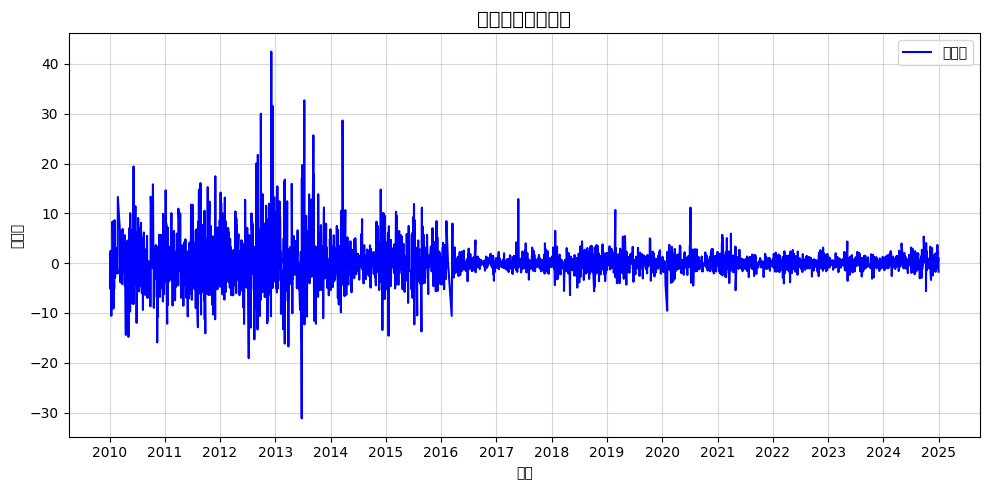

In [53]:
import matplotlib.dates as mdates  # 导入日期格式化模块

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=filtered_df, x="日期", y="涨跌幅", marker=None, color="b", label="涨跌幅")

# --- 关键修改：设置横轴仅显示年份 ---
ax.xaxis.set_major_locator(mdates.YearLocator())  # 每年一个刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # 格式化为年份（如"2020"）

# 美化图表（隐藏了冗余的xlabel/ylabel/xticks）
plt.title("涨跌幅随时间变化", fontsize=14)
plt.grid(True, linestyle="-", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9476/1885266651.py:14: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}

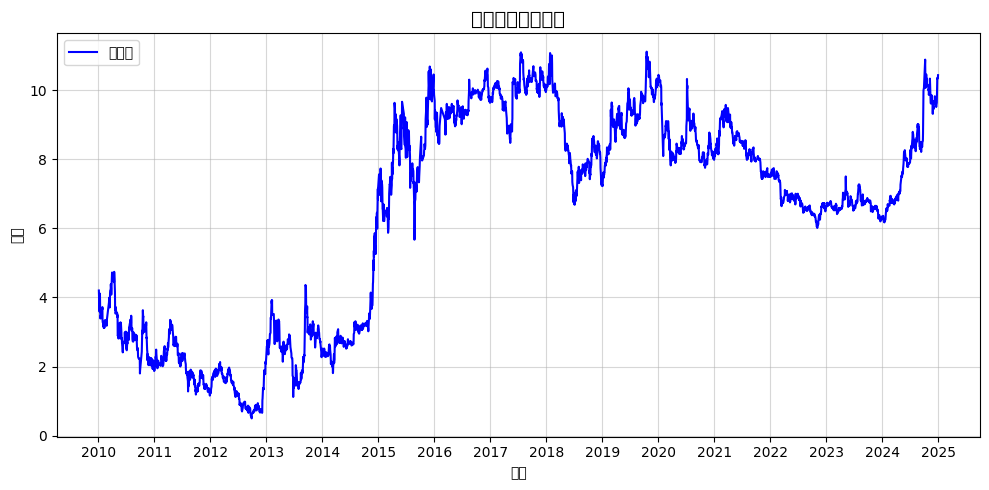

In [54]:
import matplotlib.dates as mdates  # 导入日期格式化模块

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=filtered_df, x="日期", y="开盘", marker=None, color="b", label="涨跌幅")

# --- 关键修改：设置横轴仅显示年份 ---
ax.xaxis.set_major_locator(mdates.YearLocator())  # 每年一个刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # 格式化为年份（如"2020"）

# 美化图表（隐藏了冗余的xlabel/ylabel/xticks）
plt.title("开盘价随时间变化", fontsize=14)
plt.grid(True, linestyle="-", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()